In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

from deepalign import fs
from deepalign.utils import microsoft_colors

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

sns.set_style('white')
%config InlineBackend.figure_format = 'retina'

First, let us load the evaluation dataframe from the Excel file.

In [3]:
evaluation = pd.read_excel(str(fs.OUT_DIR / 'evaluation.xlsx'))

We will create som helper functions to prettify our evaluation dataframe.

In [20]:
datasets = dict(paper='Paper', p2p='P2P', huge='Huge', small='Small', medium='Medium', 
                large='Large', gigantic='Gigantic', wide='Wide')
algorithms = {'confnet00': r'DeepAlign$\emptyset$', 'confnet01': 'DeepAlignC', 
              'confnet10': 'DeepAlignE', 'confnet11': 'DeepAlignCE', 
              'optimal': 'Reference Model', 'im': 'Inductive Miner', 'hm': 'Heuristics Miner'}

In [21]:
def prettify_dataframe(base_df):
    df = base_df.copy()

    lookup = {
        'process_model': datasets,
        'algorithm': algorithms,
    }

    for key, value in lookup.items():
        if key in df:
            df[key] = df[key].replace(value)

    return df

## Tables from Sec. 5

In [35]:
eval_df = prettify_dataframe(evaluation)

In [36]:
df = eval_df
df = df.query('k == 1')

df = df.groupby(['algorithm', 'dataset_type', 'dataset', 'process_model', 'k', 'binary_label'])['accuracy', 'optimality', 'error'].mean().reset_index()
df = df.groupby(['algorithm', 'dataset_type', 'dataset', 'process_model', 'k'])['accuracy', 'optimality', 'error'].mean().reset_index()

In [37]:
df = df.melt(id_vars=['algorithm', 'dataset', 'process_model', 'k'], value_vars=['accuracy', 'optimality', 'error'], var_name='metric')

p = pd.pivot_table(
    df.query('process_model != "Paper"'), 
    index=['metric'], 
    columns=['algorithm'], 
    values=['value'],
    aggfunc=['mean']
)
p = p.T[['accuracy', 'optimality', 'error']]

style = p.style
p = style.format({'accuracy': '{:.2%}', 'optimality': '{:.2%}', 'error': '{:.2f}'})

display(p)

In [38]:
p = pd.pivot_table(
    df.query('metric == "accuracy" and process_model != "Paper"'), # paper has optimal case attributes for demonstration purposes, exclude it
    index=['process_model'], 
    columns=['algorithm'], 
    values=['value']
)

p = p.T[['P2P', 'Small', 'Medium', 'Large', 'Huge', 'Gigantic', 'Wide']]

style = p.style
p = style.format('{:.2%}')

display(p)

## Additional Figures

### Boxplot

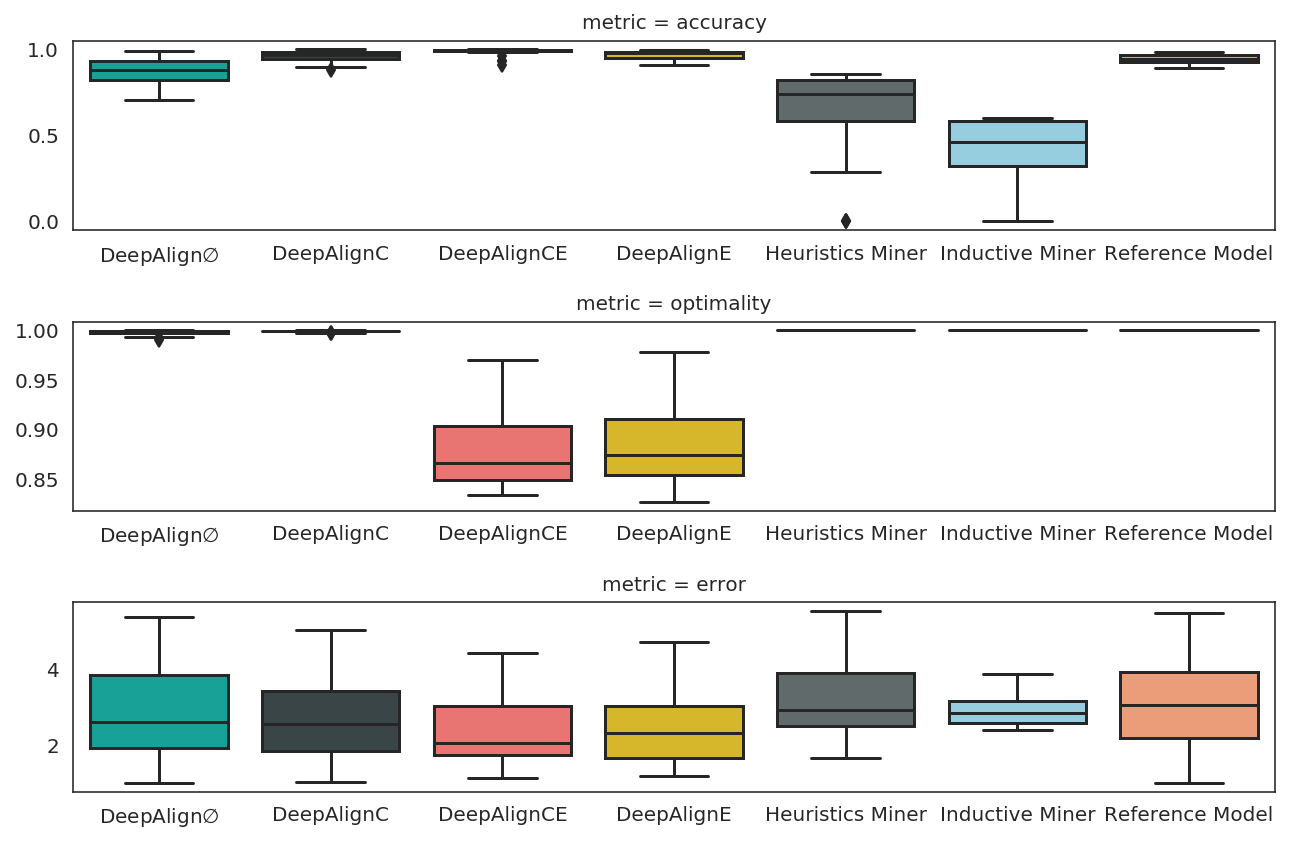

In [43]:
df = eval_df
df = df.query('k == 1')

df = df.groupby(['algorithm', 'dataset', 'process_model', 'k', 'binary_label'])['accuracy', 'optimality', 'error'].mean().reset_index()
df = df.groupby(['algorithm', 'dataset', 'process_model', 'k'])['accuracy', 'optimality', 'error'].mean().reset_index()

df = df.melt(id_vars=['algorithm', 'dataset', 'process_model', 'k'], value_vars=['accuracy', 'optimality', 'error'], var_name='metric')

g = sns.FacetGrid(data=df, row='metric', sharex=False, sharey=False, despine=False, height=2, aspect=4.5)
g = g.map_dataframe(sns.boxplot, x='algorithm', y='value', palette=microsoft_colors)
g = g.add_legend()

### Per dataset

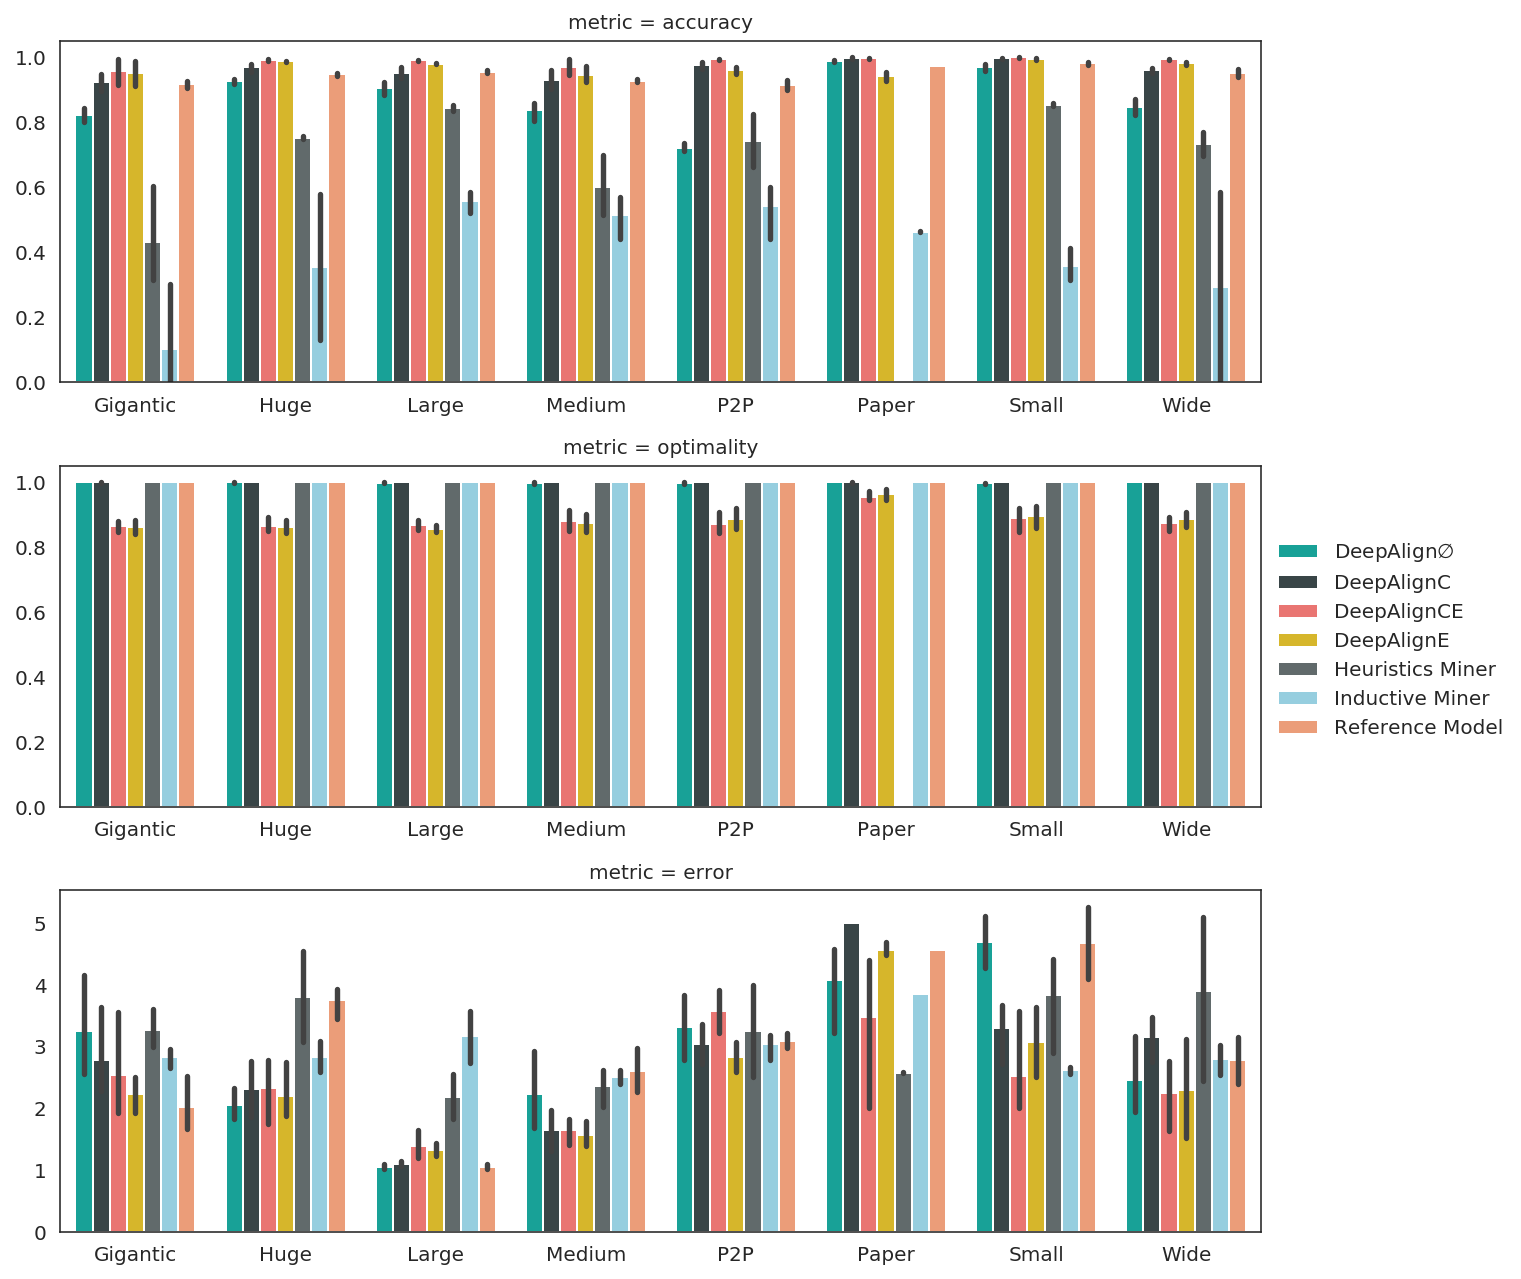

In [42]:
df = eval_df
df = df.query('k == 1')

df = df.groupby(['algorithm', 'dataset', 'process_model', 'k', 'binary_label'])['accuracy', 'optimality', 'error'].mean().reset_index()
df = df.groupby(['algorithm', 'dataset', 'process_model', 'k'])['accuracy', 'optimality', 'error'].mean().reset_index()

df = df.melt(id_vars=['algorithm', 'dataset', 'process_model', 'k'], value_vars=['accuracy', 'optimality', 'error'], var_name='metric')

g = sns.FacetGrid(data=df, row='metric', sharex=False, sharey=False, despine=False, height=3, aspect=3)
g = g.map_dataframe(sns.barplot, x='process_model', y='value', hue='algorithm', palette=microsoft_colors)
g = g.add_legend()

### Per anomaly type

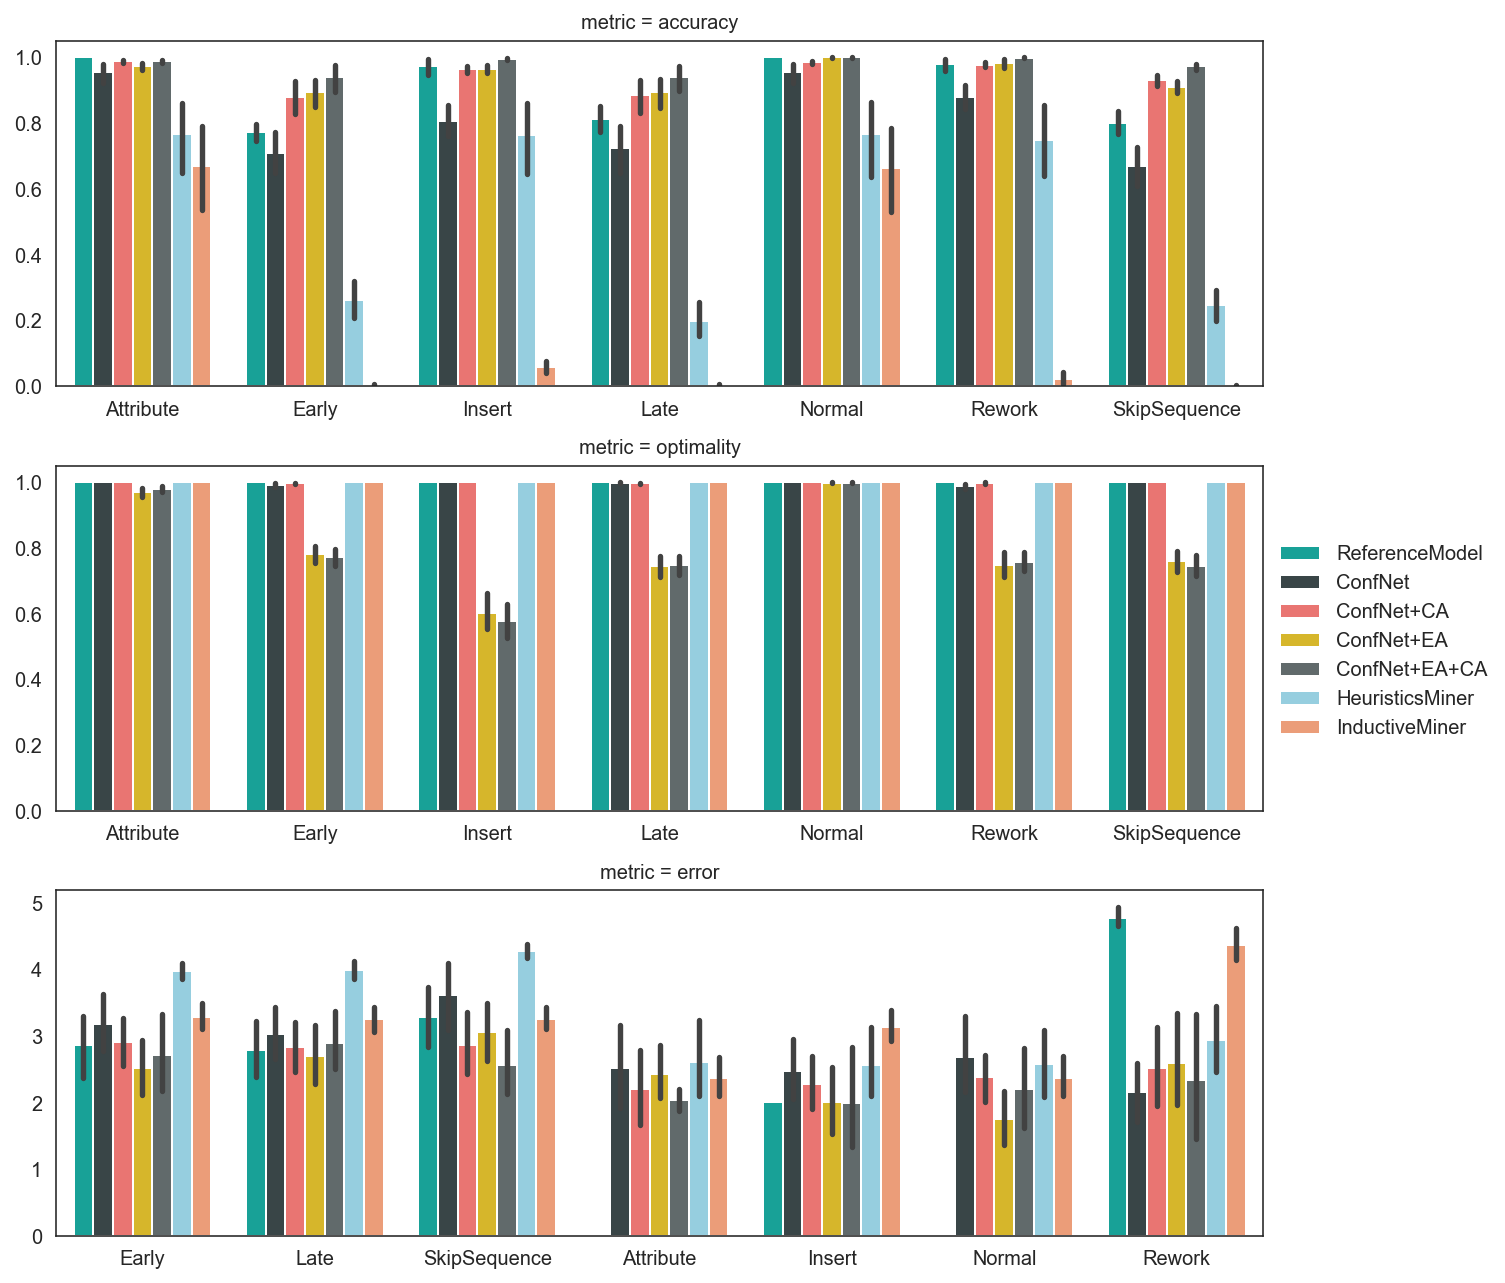

In [87]:
df = eval_df
df = df.query('k == 1')

df = df.groupby(['algorithm', 'dataset', 'process_model', 'k', 'binary_label'])['accuracy', 'optimality', 'error'].mean().reset_index()
df = df.groupby(['algorithm', 'dataset', 'process_model', 'k'])['accuracy', 'optimality', 'error'].mean().reset_index()

g = sns.FacetGrid(data=df, sharex=False, sharey=False, despine=False, height=4, aspect=3)
g = g.map_dataframe(sns.barplot, x='process_model', y='accuracy', hue='algorithm', palette=microsoft_colors,
                    hue_order=['ReferenceModel', 'ConfNet', 'ConfNet+CA', 'ConfNet+EA', 'ConfNet+EA+CA', 'HeuristicsMiner', 'InductiveMiner'])
g = g.add_legend()